In [1]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing  
import time
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [2]:
def rmsle(y_pred, y_actual):
    y_pred = y_pred.astype(int)
    y_pred[y_pred<0] = 0
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

In [3]:
df_train = pd.read_csv("../train.csv")
df_test = pd.read_csv("../test.csv")

In [4]:
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour
#df_train['year'] = pd.DatetimeIndex(df_train.datetime).year
#df_train = df_train.drop(['datetime','casual','registered'],axis=1)
df_train = df_train.drop(['datetime'],axis=1)

In [5]:
#df_train_train = df_train.drop(['count','registered','casual','holiday','workingday','weather','season'],axis = 1)
#df_train_train = df_train.drop(['count','registered','casual'],axis = 1)
#df_train_target_a = df_train['casual']
#df_train_target_b = df_train['registered']
#df_train_target_c = df_train['count']

In [6]:
df_train_unique = df_train[['season','holiday','workingday','weather']].drop_duplicates()
df_train_unique = pd.DataFrame(df_train_unique.values)
df_train_unique.columns = ['season','holiday','workingday','weather']
df_train_unique_i = df_train_unique.iloc[[0]]

In [7]:
df_in = df_train[(df_train['season']==df_train_unique_i['season'].values[0])
                &(df_train['holiday']==df_train_unique_i['holiday'].values[0])
                &(df_train['workingday']==df_train_unique_i['workingday'].values[0])
                &(df_train['weather']==df_train_unique_i['weather'].values[0])]
df_target = df_in
arch = (100,)*3
iterations = 10000

In [8]:
df_in = df_train
df_target = df_in

{'error': 0.59395485361090705, 'fit': 0.87467268804061016, 'time': 72.26243199999999}


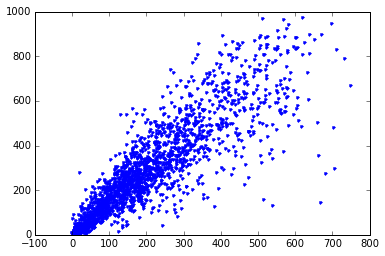

In [9]:
#def ann_train(df_in,df_target,arch,iterations):
params = {#'activation' :'tanh', 
          'solver':'adam', 
          'hidden_layer_sizes': arch,
          'verbose':False,
          'learning_rate':'adaptive',
          'warm_start':False, 
          'tol':1e-30, 
          'max_iter':iterations,
          'early_stopping':False}
df_train_strip = df_in.drop(['count','registered','casual','holiday','workingday','weather','season'],axis = 1)
df_target_strip = df_target[['casual','registered','count']] 
#df_train_strip = df_in
#df_target_strip = df_target
df_train_train_a_1 = df_train_strip[0:int(len(df_train_strip )*.8)]
df_train_train_a_2 = df_train_strip[int(len(df_train_strip)*.8)+1:len(df_train_strip)]
df_train_target_a_1 = df_target_strip[0:int(len(df_target_strip)*.8)]
df_train_target_a_2 = df_target_strip[int(len(df_target_strip)*.8)+1:len(df_target_strip)]
time_start = time.clock()
ann1 = MLPRegressor(**params).fit(preprocessing.scale(df_train_train_a_1),df_train_target_a_1['casual'])
ann2 = MLPRegressor(**params).fit(preprocessing.scale(df_train_train_a_1),df_train_target_a_1['registered'])
ann3 = MLPRegressor(**params).fit(preprocessing.scale(df_train_train_a_1),df_train_target_a_1['count'])
time_elapsed = (time.clock() - time_start)
fit1 = ann1.score(preprocessing.scale(df_train_train_a_1),df_train_target_a_1['casual'])
fit2 = ann2.score(preprocessing.scale(df_train_train_a_1),df_train_target_a_1['registered'])
fit3 = ann3.score(preprocessing.scale(df_train_train_a_1),df_train_target_a_1['count'])
fit = np.mean([fit1,fit2])
pred_test1 = ann1.predict(preprocessing.scale(df_train_train_a_2))
pred_test2 = ann2.predict(preprocessing.scale(df_train_train_a_2))
pred_test3 = ann3.predict(preprocessing.scale(df_train_train_a_2))
pred_test = pred_test1 + pred_test2
pred = np.array(pred_test)
target = np.array(df_train_target_a_2['count'].values)
error =  rmsle(pred_test,target)
fitplot = plt.plot(pred_test,target,'.')
print {'time' : time_elapsed,'fit' : fit, 'error' : error}#, 'ann':ann}

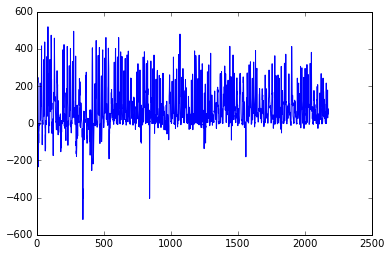

In [10]:
plt.plot(target-pred_test)

In [11]:
#df_test_test = df_test
df_test_test = df_test.drop(['holiday','workingday','weather','season'],axis = 1)
df_test_test['month'] = pd.DatetimeIndex(df_test_test.datetime).month
df_test_test['day'] = pd.DatetimeIndex(df_test_test.datetime).dayofweek
df_test_test['hour'] = pd.DatetimeIndex(df_test_test.datetime).hour
df_test_test = df_test_test.drop(['datetime'],axis = 1)

In [12]:
out1 = ann1.predict(preprocessing.scale(df_test_test))
out2 = ann2.predict(preprocessing.scale(df_test_test))
out3 = ann3.predict(preprocessing.scale(df_test_test))
out = out1 + out2

#out = out3

In [13]:
out = out.astype(int)
out[out<0] = 0

In [14]:
pred = pd.DataFrame({'datetime': df_test['datetime'],'count': out})
pred = pred[['datetime','count']]

In [15]:
pred.to_csv("pred.csv", index = False)

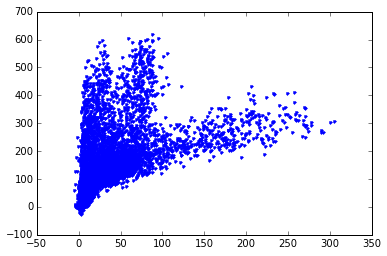

In [16]:
plt.plot(out1,out2,'.')

In [17]:
#plt.plot(out,out3,'.')

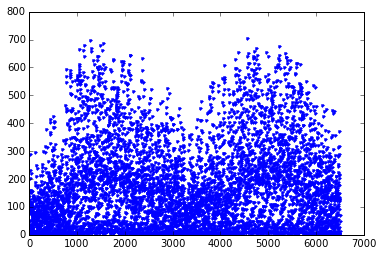

In [18]:
plt.plot(out,'.')

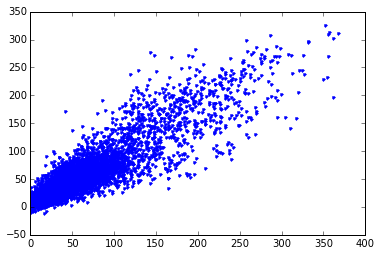

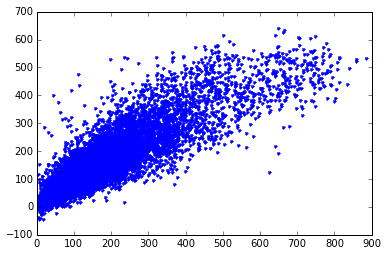

In [19]:
plt.plot(df_target_strip['casual'],ann1.predict(preprocessing.scale(df_train_strip)) ,'.')
plt.show()
plt.plot(df_target_strip['registered'],ann2.predict(preprocessing.scale(df_train_strip)) ,'.')

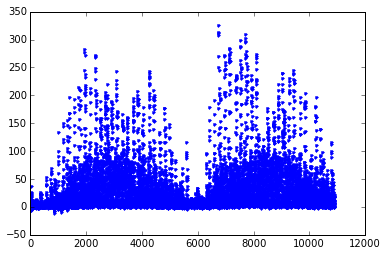

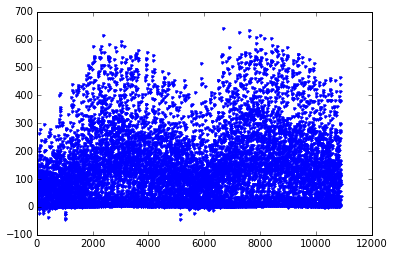

In [20]:
plt.plot(ann1.predict(preprocessing.scale(df_train_strip)) ,'.')
plt.show()
plt.plot(ann2.predict(preprocessing.scale(df_train_strip)) ,'.')

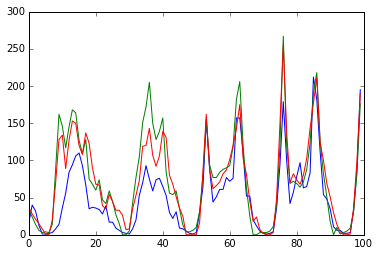

In [26]:
l1 = 0
l2 = l1 +  100 #len(df_target_strip['count'])
a = df_target_strip['count'] [l1:l2]
b = ( ann1.predict(preprocessing.scale(df_train_strip)) 
    + ann2.predict(preprocessing.scale(df_train_strip))
    )[l1:l2]
b = b.astype(int)
b[b<0]=0
c = ann3.predict(preprocessing.scale(df_train_strip)) [l1:l2]
c = c.astype(int)
c = np.array(c)
c[c<0]=0
plt.plot(range(len(a)),a,range(len(b)),b,range(len(c)),c)

In [22]:
rmsle(a,b)

0.50448418685120455

In [23]:
rmsle(a,c)

0.57997547472035649

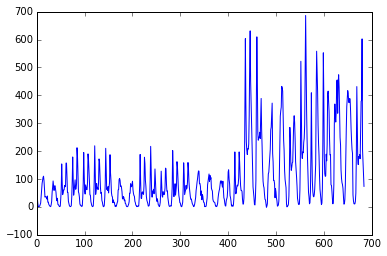

In [24]:
plt.plot(df_train[df_train['month']==1][1:430]['count'].append(pd.DataFrame(
        np.array(ann1.predict(preprocessing.scale(df_test_test[1:257])))+ np.array(ann2.predict(preprocessing.scale(df_test_test[1:257])))) ))